# NN

$$Z=\varphi(W^TX+B)$$

# softmax

$$\alpha=\cfrac{e^{Zi}}{\Sigma e^{Zi}}$$

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

C:\Users\w8462\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
X=x_train[666]

In [8]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  50, 237, 203,  75,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         37, 232, 254, 254, 244,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
        156, 254, 209, 250, 254, 131,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
X.shape

(28, 28)

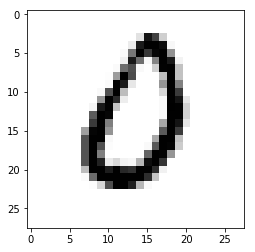

In [10]:
plt.imshow(X,cmap='Greys')

In [11]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [12]:
from keras.utils import np_utils

In [13]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [14]:
y_train[666]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 開始訓練

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [16]:
model=Sequential()

In [17]:
model.add(Dense(4,input_dim=784))
model.add(Activation('sigmoid'))

In [18]:
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

Epoch 1/20


InternalError: Blas GEMM launch failed : a.shape=(100, 784), b.shape=(784, 4), m=100, n=4, k=784
	 [[{{node dense_1/MatMul}} = MatMul[T=DT_FLOAT, _class=["loc:@training/SGD/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_37, dense_1/kernel/read)]]

In [ ]:
from ipywidgets import interact_manual

In [ ]:
pridict = model.predict_classes(x_test)

In [ ]:
pridict

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為',pridict[測試編號])

In [ ]:
test(666)

In [ ]:
interact_manual(test,測試編號=(0,999))

In [ ]:
score=model.evaluate(x_test,y_test)

In [ ]:
print('loss',score[0])
print('正確率',score[1])

In [ ]:
model_jason=model.to_json()
open('stupid_model.json','w').write(model_jason)
model.save_weights('stupid_model_weights.h5')

In [ ]:
from keras.models import model_from_json

In [ ]:
model=model_from_json(open('stupid_model.json').read())
model.load_weights('stupid_model_weights.h5')

In [ ]:
model.compile(loss='mse',optimizer=SGD(lr=0.087))

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
X=x_train[666]

In [ ]:
X.reshape(1,784)

In [ ]:
model.predict_classes(X.reshape(1,784))

In [ ]:
plt.imshow(X,cmap='Greys')